# Project VI - Solution of Initial Value Problems

In [1]:
#################### DO NOT CHANGE ####################
# All libraries will be imported in this cell
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve as fs
from tabulate import tabulate as table
######################################################

Consider the initial-value-problem:

$$
\begin{align*}
x^{''}(t)+2\gamma x^{'}+\omega^{2} x(t)=0 \\
x(0)=x_0 \\ 
x^{'}(0)=\gamma x_0
\end{align*}
$$

with $0 < \gamma < \omega$. It's solution is given by
$$x(t)=x_0 e^{-\gamma t} \cos(\beta t)$$

where $\beta = \sqrt{\omega^{2}-\gamma^{2}}$. This equation can be written as a first order system, with $x^{'}=y$, and $y^{'}=-2\gamma y - \omega^2 x$.

In [2]:
#################### DO NOT CHANGE ####################
global x0, steps, gamma, omega
######################################################

## Your task

### Explicit Midpoint

Implement the Explicit Midpoint method (EMP) doing
$$\frac{x_{n+1}−x_{n−1}}{2h}=y_n\\
\frac{y_{n+1}−y_{n−1}}{2h}=−2\gamma y_n− \omega^2x_n $$

In [3]:
#################### DO NOT CHANGE ####################
def mid_point():    
    y = np.zeros(steps+1)
    xl = np.zeros(steps+1)
    
    xp0 = x0 * gamma
    
    xl[0] = x0
    y[0] = xp0
    
    for i in range(0, steps):
        if i == 0:
            xl[i+1] = 2 * h * y[i]
            y[i+1] = -4 * gamma * h * y[i] - 2 * omega**2 * h * xl[i]
        else:
            xl[i+1] = xl[i-1] + 2*  h * y[i]
            y[i+1] = y[i-1] - 4 * gamma * h * y[i] - 2 * omega**2 * h * xl[i]
    return xl
######################################################

### Implicit Midpoint

Implement the Implicit Midpoint method (IMP) doing
$$ \frac{x_{n+1}−x_n}{h}=\frac{y_{n+1}+y_n}{2}\\
\frac{y_{n+1}−y_n}{h}=−2\gamma \frac{y_{n+1}+y_n}{2}−\omega^2\frac{x_{n+1}+x_n}{2}$$

In [4]:
#################### DO NOT CHANGE ####################
def IMP(p):
    X, Y = p
    
    deriv = np.array([0., 0.])
    deriv[0] = (Y + x_imp[1]) / 2 - (X - x_imp[0]) / h
    deriv[1] = -2 * gamma * (Y + x_imp[1]) / 2 - omega**2 * (X + x_imp[0]) / 2 - (Y - x_imp[1]) / h
    
    return deriv

def implicit_mid_point():    
    global x_imp
    x_imp = np.array([x0, xp0])
    traj = x_imp

    for i in range(1, steps+1):
        x_new = fs(IMP, x_imp) 
        traj = np.vstack([traj, x_new])
        x_imp = x_new
    
    return traj
######################################################

### Non-Standard Implicit Midpoint

Implement the Non-standard Implicit Midpoint method (NSIMP) doing
$$\frac{x_{n+1}−e^{−\gamma h}x_n}{h}=\frac{y_{n+1}+e^{−\gamma h}y_n}{2}\\
\frac{y_{n+1}−e^{−\gamma h}y_n}{h}=−\omega^2\frac{x_{n+1}+e^{−\gamma h}x_n}{2}$$

In [5]:
#################### DO NOT CHANGE ####################
def NSIMP(p):
    X, Y = p
    deriv = np.array([0., 0.])
    deriv[0] = (Y + np.exp(-gamma * h) * x_nsimp[1]) / 2 - (X - np.exp(-gamma * h) * x_nsimp[0]) / h
    deriv[1] = -omega**2 * (X + np.exp(-gamma * h) * x_nsimp[0]) / 2 - (Y - np.exp(-gamma * h) * x_nsimp[1]) / h
    
    return deriv

def ns_implicit_mid(): 
    global x_nsimp
    x_nsimp = np.array([x0, xp0])
    traj = x_nsimp

    for i in range(1, steps+1):
        x_new = fs(NSIMP, x_nsimp) 
        traj = np.vstack([traj, x_new])
        x_nsimp = x_new
    
    return traj
######################################################

 - All three methods are second order and they do not differ much in terms of computational cost; demonstrate this numerically.  I expect several table with the results.

 - For $\gamma=0$  the  implicit  methods  are  equivalent,  and  we  expect  they  are  superior  to  the explicit method; check this numerically using long time simulations with varioush, $\omega$, $x_0$.

- Experiment on the long-time accuracy of the methods for small values of $\gamma>0$.

- Run experiments to help you fully understand what happens to the approximations as $\gamma$ increases.

- If there is, in fact, a ’breaking point’ for any method as $\gamma$ increases determine what it is and how it depends upon $h$ or $\omega$.

In [6]:
#################### DO NOT CHANGE ####################
def exact():
    y = np.zeros(steps+1)
    b = np.sqrt((omega**2) - (gamma**2))
    
    for i in range(0, (steps+1)):
        y[i] = x0 * np.exp(-gamma * t[i]) * np.cos(b * t[i])
    return y

def relative_error(exact, approx, steps):
    rel = np.zeros((steps+1,))
    
    for i in range(0, steps+1):
        rel[i] = abs(exact[i] - approx[i]) / abs(exact[i])
        
    return rel
######################################################

In [7]:
#################### DO NOT CHANGE ####################
def results(t, x_m, x_i, x_n, err1, err2, err3, x_ex):
    return list(zip(range(x_m.shape[0]), t, x_m, x_i, x_n, err1, err2, err3, x_ex))
######################################################

In [8]:
#################### DO NOT CHANGE ####################
def main():
    global t0, h, xp0, t

    t0 = 0
    tf = 1
    h = (tf - t0) / steps
    xp0 = x0 * gamma
    t = np.arange(t0, tf + h, h)

    x_m = mid_point()
    x_i = implicit_mid_point()
    x_n = ns_implicit_mid()
    x_ex = exact()

    error_mid = relative_error(x_ex, x_m, steps)
    error_imp = relative_error(x_ex, x_i[:,0], steps)
    error_nsimp = relative_error(x_ex, x_n[:,0], steps)
    error_exact = relative_error(x_ex, x_ex, steps)

    plt.figure(figsize=(9, 5))
    plt.plot(t, x_ex, "limegreen", label="Exact Solution")
    plt.plot(t, x_m, "cornflowerblue", label="EMP")
    plt.plot(t, x_i[:,0], "blueviolet", label="IMP")
    plt.plot(t, x_n[:,0], "darkorange", label="NSIMP")
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.title("Exact solution and methods")
    plt.legend(loc="upper right", fontsize="small")
    plt.show()

    plt.figure(figsize=(9,5))
    plt.plot(t, error_exact, "limegreen", label="Exact Error")
    plt.plot(t, error_mid, "cornflowerblue", label="EMP Error")
    plt.plot(t, error_imp, "blueviolet", label="IMP Error")
    plt.plot(t, error_nsimp, "darkorange", label="NSIMP Error")
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.title("Errors")
    plt.legend(loc="upper right", fontsize="small")
    plt.show()

    print()
    print(f"Testing using: steps = {steps}, x0 = {x0}, gamma = {gamma}, omega = {omega}.", end="\n\n\n\n")
    table_results = results(t, x_m, x_i[:,0], x_n[:,0], error_mid, error_imp, error_nsimp, x_ex)
    print(table(table_results, headers=["n", "t", "x_mid", "x_imp", "x_nsimp", "err_mid", "err_imp", "err_nsimp", "exact"]))
    
    return
######################################################

### Testing `steps`, `x0`, `gamma` & `omega` begins here.

#### Testing instructions:
Please **do not add, edit, or delete** anything marked with: `#################### DO NOT CHANGE ####################`

When testing different values, copy and paste the following snippet in separate cells:
```python
steps = 10
x0 = 1
gamma = 0.1
omega = 1
main()
```

- Change ONLY ONE parameter at a time (parameters: `steps`, `x0`, `gamma`, and `omega`)
- Add a comment in respective code cell or in Markdown cell below outputs about changes you've noticed
- To see the changes in errors, look at the last row in table see how close the errors are to 0
- If you notice that any values go into the negatives, please add: `### BREAKING POINT ###` at the top of the code cell
- Keep all of your testing results


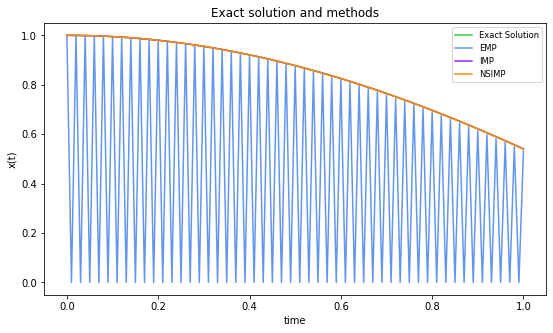

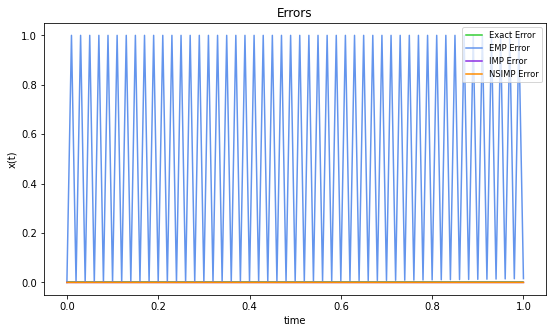


Testing using: steps = 100, x0 = 1, gamma = 0, omega = 1.



  n     t     x_mid     x_imp    x_nsimp      err_mid      err_imp    err_nsimp     exact
---  ----  --------  --------  ---------  -----------  -----------  -----------  --------
  0  0     1         1          1         0            0            0            1
  1  0.01  0         0.99995    0.99995   1            8.33345e-10  8.33345e-10  0.99995
  2  0.02  0.9996    0.9998     0.9998    0.000200047  3.33371e-09  3.33371e-09  0.9998
  3  0.03  0         0.99955    0.99955   1            7.50211e-09  7.50211e-09  0.99955
  4  0.04  0.9988    0.9992     0.9992    0.000400267  1.33402e-08  1.33402e-08  0.9992
  5  0.05  0         0.99875    0.99875   1            2.08503e-08  2.08503e-08  0.99875
  6  0.06  0.997601  0.998201   0.998201  0.000600821  3.00355e-08  3.00355e-08  0.998201
  7  0.07  0         0.997551   0.997551  1            4.08994e-08  4.08994e-08  0.997551
  8  0.08  0.996002  0.996802   0.996802  0.00080187

In [53]:
# SCENARIO 1:

# Setting gamma to 0 and omega to 1, IMP and NSIMP have an error of 1.29782e-05 which is 
# significantly smaller than the EMP error of 0.015601 by 120109%.

steps = 100
x0 = 1
gamma = 0
omega = 1
main()

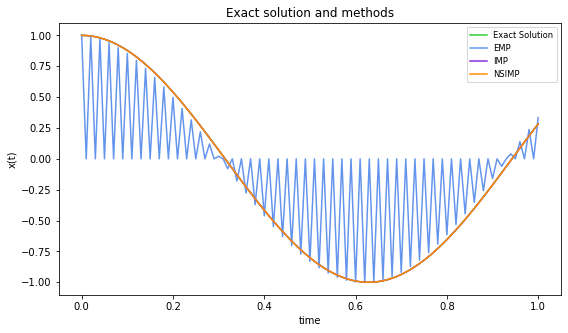

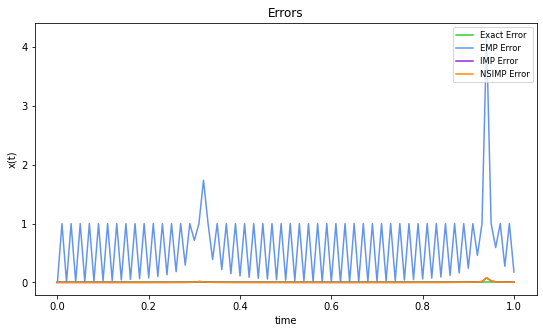


Testing using: steps = 100, x0 = 1, gamma = 0, omega = 5.



  n     t       x_mid       x_imp     x_nsimp     err_mid      err_imp    err_nsimp       exact
---  ----  ----------  ----------  ----------  ----------  -----------  -----------  ----------
  0  0      1           1           1          0           0            0             1
  1  0.01   0           0.998751    0.998751   1           5.21018e-07  5.21018e-07   0.99875
  2  0.02   0.99        0.995006    0.995006   0.00502929  2.08931e-06  2.08931e-06   0.995004
  3  0.03   0           0.988776    0.988776   1           4.72072e-06  4.72072e-06   0.988771
  4  0.04   0.9701      0.980075    0.980075   0.0101693   8.44222e-06  8.44222e-06   0.980067
  5  0.05   0           0.968925    0.968925   1           1.32927e-05  1.32927e-05   0.968912
  6  0.06   0.940499    0.955355    0.955355   0.0155312   1.93243e-05  1.93243e-05   0.955336
  7  0.07   0           0.939398    0.939398   1           2.6604e-05   2.6604e-05    0.9

In [54]:
### BREAKING POINT ###

# SCENARIO 2:

# Setting gamma to 0 and omega to 5, IMP and NSIMP have an error of 0.00352059 which is
# still significantly smaller than 0.176181 by 4904%

# When t = 0.32, and the exact solution = -0.0291995, EMP breaks and the error = 1.73658
# When t = 0.94, and the exact solution = -0.0123887, EMP breaks and the error = 4.19902

steps = 100
x0 = 1
gamma = 0
omega = 5
main()

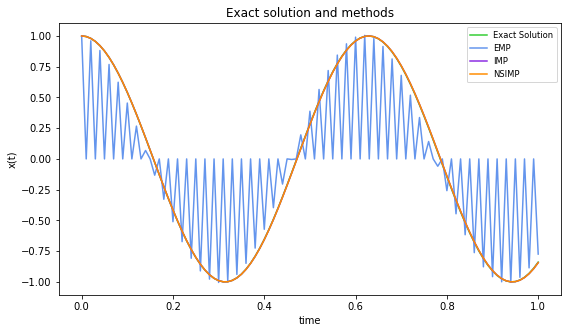

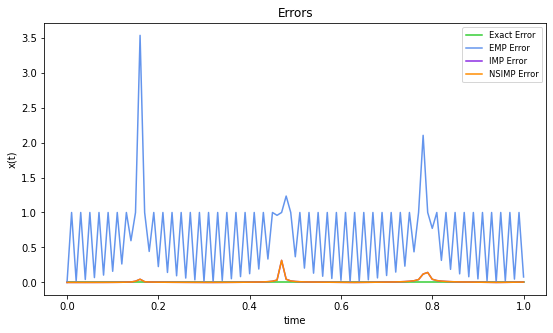


Testing using: steps = 100, x0 = 1, gamma = 0, omega = 10.



  n     t        x_mid       x_imp     x_nsimp     err_mid      err_imp    err_nsimp       exact
---  ----  -----------  ----------  ----------  ----------  -----------  -----------  ----------
  0  0      1            1           1          0           0            0             1
  1  0.01   0            0.995012    0.995012   1           8.34524e-06  8.34524e-06   0.995004
  2  0.02   0.96         0.9801      0.9801     0.0204747   3.37206e-05  3.37206e-05   0.980067
  3  0.03   0            0.95541     0.95541    1           7.71871e-05  7.71871e-05   0.955336
  4  0.04   0.8816       0.921191    0.921191   0.042843    0.000140665  0.000140665   0.921061
  5  0.05   0            0.877782    0.877782   1           0.000227199  0.000227199   0.877583
  6  0.06   0.767936     0.825617    0.825617   0.069547    0.000341432  0.000341432   0.825336
  7  0.07   0            0.765217    0.765217   1           0.00049043   0.000

In [55]:
### BREAKING POINT ###

# SCENARIO 3:

# Setting gamma to 0 and omega to 10, IMP and NSIMP have an error of 0.00536024 which is
# still significantly smaller than 0.0778307 by 1352%.

# When t = 0.16, and the exact solution = -0.0291995, EMP breaks and the error = 3.53191
#   IMP and NSIMP also break and the error = 0.0455759
# When t = 0.48, and the exact solution = 0.087499, EMP breaks and the error = 1.23484
#   IMP and NSIMP also break and the error = 0.0454792
# When t = 0.78, and the exact solution = 0.0539554, EMP breaks and the error = 2.10292
#   IMP and NSIMP also break and the error = 0.120092

steps = 100
x0 = 1
gamma = 0
omega = 10
main()

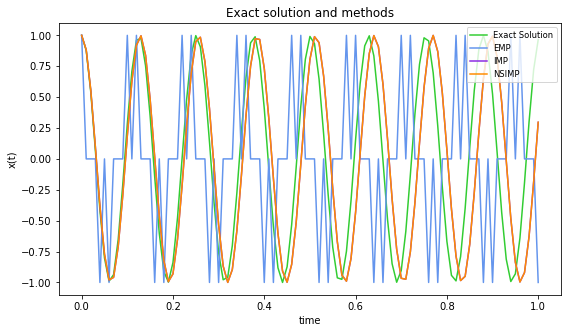

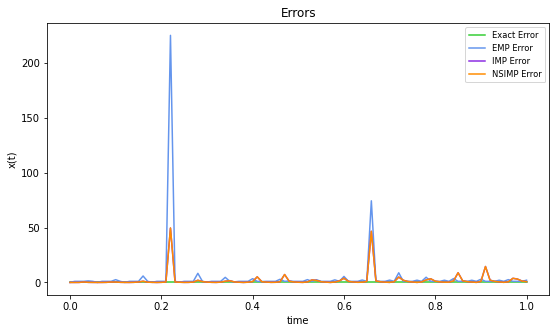


Testing using: steps = 100, x0 = 1, gamma = 0, omega = 50.



  n     t    x_mid       x_imp     x_nsimp      err_mid      err_imp    err_nsimp       exact
---  ----  -------  ----------  ----------  -----------  -----------  -----------  ----------
  0  0           1   1           1            0           0            0            1
  1  0.01        0   0.882353    0.882353     1           0.00543582   0.00543582   0.877583
  2  0.02        0   0.557093    0.557093     1           0.0310773    0.0310773    0.540302
  3  0.03        0   0.100753    0.100753     1           0.42433      0.42433      0.0707372
  4  0.04       -1  -0.379294   -0.379294     1.403       0.0885577    0.0885577   -0.416147
  5  0.05        0  -0.770095   -0.770095     1           0.0387552    0.0387552   -0.801144
  6  0.06       -1  -0.979698   -0.979698     0.0101087   0.0103989    0.0103989   -0.989992
  7  0.07        0  -0.958783   -0.958783     1           0.0238413    0.0238413   -0.936457
  8  0.08  

In [56]:
### BREAKING POINT ###

# SCENARIO 4:

# Setting gamma to 0 and omega to 50, IMP and NSIMP have an error of 0.692715 which is
# still significantly smaller than 2.03631 by 194%.

# When t = 0.22, and the exact solution = 0.0044257, EMP breaks and the error = 224.953
#   IMP and NSIMP also break and the error = 49.5405
# When t = 0.48, and the exact solution =  -0.0132767, EMP breaks and the error = 74.3197
#   IMP and NSIMP also break and the error = 46.5548

steps = 100
x0 = 1
gamma = 0
omega = 50
main()

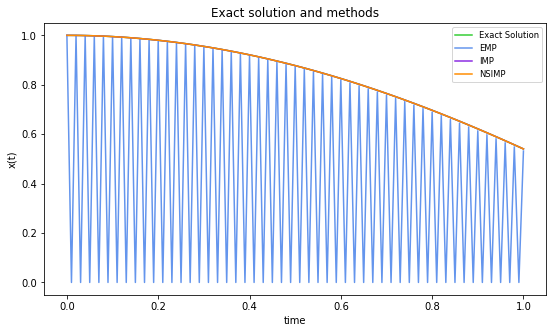

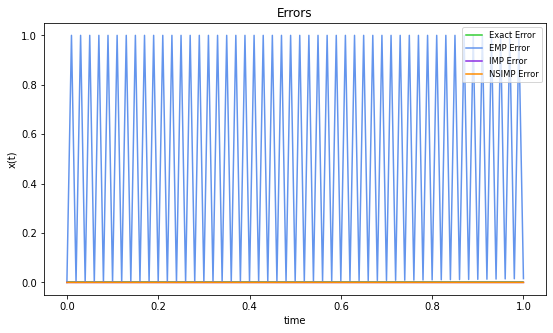


Testing using: steps = 100, x0 = 1, gamma = 1e-05, omega = 1.



  n     t        x_mid     x_imp    x_nsimp      err_mid      err_imp    err_nsimp     exact
---  ----  -----------  --------  ---------  -----------  -----------  -----------  --------
  0  0     1            1          1         0            0            0            1
  1  0.01  2e-07        0.99995    0.99995   1            2.00841e-07  1.00836e-07  0.99995
  2  0.02  0.9996       0.9998     0.9998    0.000199847  4.03389e-07  2.03359e-07  0.9998
  3  0.03  4.0008e-07   0.99955    0.99955   1            6.07685e-07  3.0759e-07   0.99955
  4  0.04  0.9988       0.999201   0.9992    0.000399867  8.1377e-07   4.1355e-07   0.9992
  5  0.05  6.0032e-07   0.998751   0.99875   0.999999     1.02169e-06  5.21263e-07  0.99875
  6  0.06  0.997601     0.998201   0.998201  0.000600222  1.23148e-06  6.30751e-07  0.9982
  7  0.07  8.00799e-07  0.997552   0.997551  0.999999     1.4432e-06   7.42039e-07  0.99755
  8  0.08  0.996002  

In [57]:
# SCENARIO 5: 

# Setting gamma to 0.00001 and omega to 1: NSIMP has the smallest error of 2.85521e-05.
# IMP error is 4.41264e-05, which is not much larger than NSIMP error by a difference of 1.55743e-05.
# EMP error is 0.0155911, which is significantly larger than NSIMP and IMP errors.

steps = 100
x0 = 1
gamma = 0.00001
omega = 1
main()

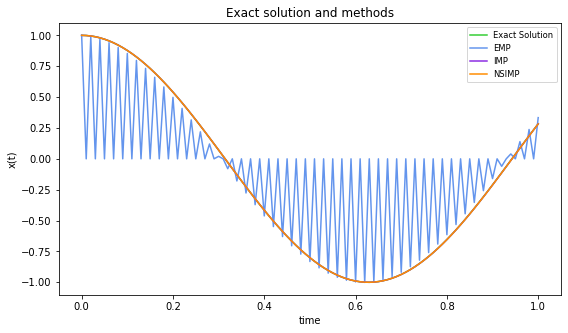

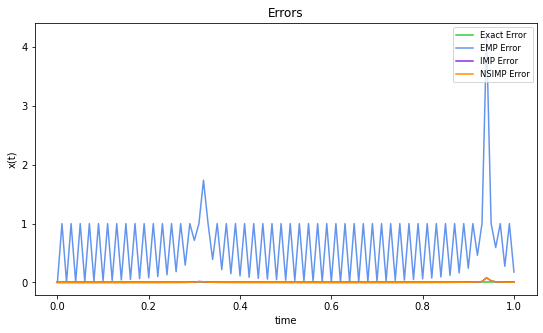


Testing using: steps = 100, x0 = 1, gamma = 1e-05, omega = 5.



  n     t         x_mid       x_imp     x_nsimp     err_mid      err_imp    err_nsimp       exact
---  ----  ------------  ----------  ----------  ----------  -----------  -----------  ----------
  0  0      1             1           1          0           0            0             1
  1  0.01   2e-07         0.998751    0.998751   1           7.21206e-07  6.21081e-07   0.99875
  2  0.02   0.99          0.995006    0.995006   0.00502909  2.49069e-06  2.28993e-06   0.995004
  3  0.03   4.02e-07      0.988776    0.988776   1           5.32532e-06  5.02293e-06   0.988771
  4  0.04   0.9701        0.980075    0.980075   0.0101689   9.25314e-06  8.84755e-06   0.980066
  5  0.05   6.0794e-07    0.968926    0.968925   0.999999    1.43142e-05  1.38033e-05   0.968912
  6  0.06   0.940499      0.955356    0.955355   0.0155306   2.05618e-05  1.99429e-05   0.955336
  7  0.07   8.19641e-07   0.939398    0.939398   0.999999    2.8064

In [58]:
### BREAKING POINT ###

# SCENARIO 6: 

# Setting gamma to 0.00001 and omega to 5: NSIMP has the smallest error of 0.00352735.
# IMP error is 0.00353411, which is not much larger than NSIMP error by a difference of 6.76e-6.
# EMP error is 0.0155911, which is significantly larger than NSIMP and IMP errors.

# When t = 0.32, and the exact solution = -0.0291994, EMP breaks and the error = 1.73659
# When t = 0.94, and the exact solution =  -0.0123885, EMP breaks and the error = 4.19906

steps = 100
x0 = 1
gamma = 0.00001
omega = 5
main()

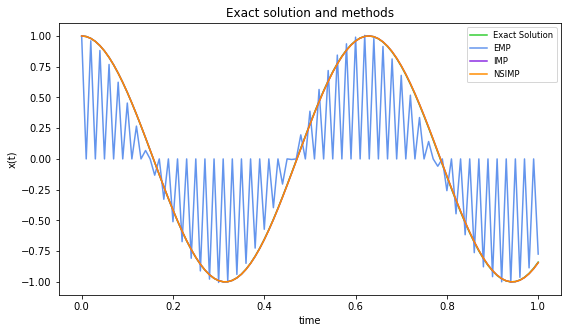

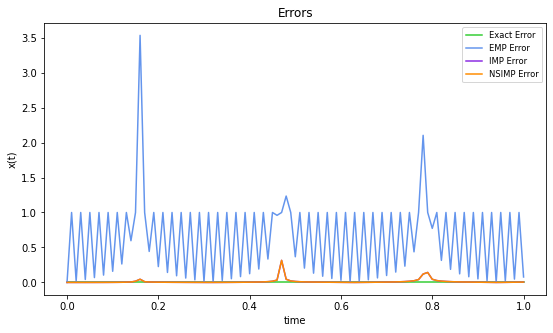


Testing using: steps = 100, x0 = 1, gamma = 1e-05, omega = 10.



  n     t         x_mid       x_imp     x_nsimp     err_mid      err_imp    err_nsimp       exact
---  ----  ------------  ----------  ----------  ----------  -----------  -----------  ----------
  0  0      1             1           1          0           0            0             1
  1  0.01   2e-07         0.995013    0.995012   1           8.54599e-06  8.44549e-06   0.995004
  2  0.02   0.96          0.9801      0.9801     0.0204745   3.41262e-05  3.39231e-05   0.980066
  3  0.03   4.08e-07      0.955411    0.95541    1           7.7806e-05   7.74962e-05   0.955336
  4  0.04   0.8816        0.921191    0.921191   0.0428426   0.000141511  0.000141087   0.921061
  5  0.05   6.3104e-07    0.877782    0.877782   0.999999    0.000228292  0.000227745   0.877582
  6  0.06   0.767936      0.825618    0.825617   0.0695464   0.0003428    0.000342115   0.825335
  7  0.07   8.74304e-07   0.765218    0.765217   0.999999    0.00

In [59]:
### BREAKING POINT ###

# SCENARIO 7: 

# Setting gamma to 0.00001 and omega to 10: NSIMP has the smallest error of 0.00536088.
# IMP error is 0.00536154, which is not much larger than NSIMP error by a difference of 6.76e-7.
# EMP error is 0.0155911, which is significantly larger than NSIMP and IMP errors.

# When t = 0.16, and the exact solution = -0.0291995, EMP breaks and the error = 3.53192
#   IMP and NSIMP also break and the error = 0.0456
# When t = 0.48, and the exact solution =  0.0874986, EMP breaks and the error = 1.23485
#   IMP and NSIMP also break and the error = 0.0455019
# When t = 0.78, and the exact solution = 0.053955, EMP breaks and the error = 2.10292
#   IMP and NSIMP also break and the error = 0.1201

steps = 100
x0 = 1
gamma = 0.00001
omega = 10
main()

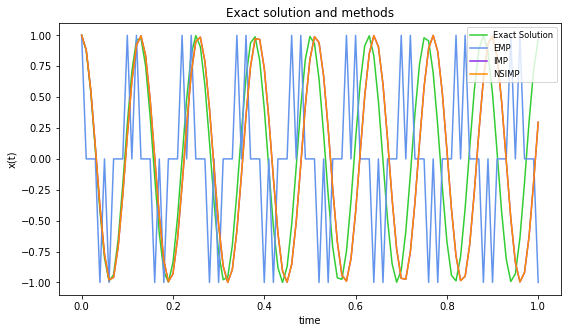

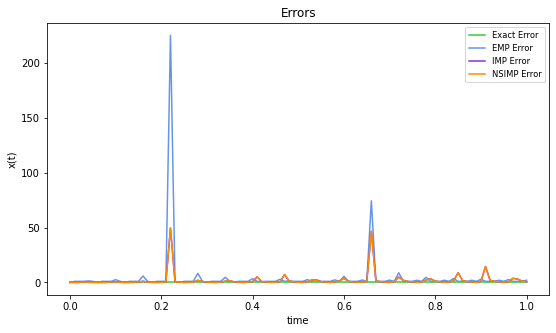


Testing using: steps = 100, x0 = 1, gamma = 1e-05, omega = 50.



  n     t         x_mid       x_imp     x_nsimp      err_mid      err_imp    err_nsimp        exact
---  ----  ------------  ----------  ----------  -----------  -----------  -----------  -----------
  0  0      1             1           1            0           0            0            1
  1  0.01   2e-07         0.882353    0.882353     1           0.00543604   0.00543593   0.877582
  2  0.02  -7.99361e-14   0.557094    0.557093     1           0.0310779    0.0310776    0.540302
  3  0.03   6e-07         0.100753    0.100753     0.999992    0.424335     0.424333     0.0707372
  4  0.04  -1            -0.379293   -0.379293     1.403       0.0885586    0.0885581   -0.416147
  5  0.05   8e-07        -0.770095   -0.770095     1           0.0387555    0.0387553   -0.801143
  6  0.06  -1            -0.979697   -0.979697     0.0101093   0.010399     0.010399    -0.989992
  7  0.07   2e-07        -0.958782   -0.958782     1 

In [60]:
### BREAKING POINT ###

# SCENARIO 8: 

# Setting gamma to 0.00001 and omega to 50: NSIMP and IMP have the smallest error of 0.692715.
# EMP error is 2.03632, which is significantly larger than IMP and EMP errors.
# These results are very simmilar to SCENARIO 4 (gamma=0 and omega=50) only difference in errors
# is the EMP. (4: 2.03631 and 8: 2.03632).

# When t = 0.22, and the exact solution = 0.00442569, EMP breaks and the error = 224.954
#   IMP and NSIMP also break and the error = 49.5406
# When t = 0.66, and the exact solution =  -0.0132767, EMP breaks and the error = 74.3202
#   IMP and NSIMP also break and the error = 46.5548

steps = 100
x0 = 1
gamma = 0.00001
omega = 50
main()

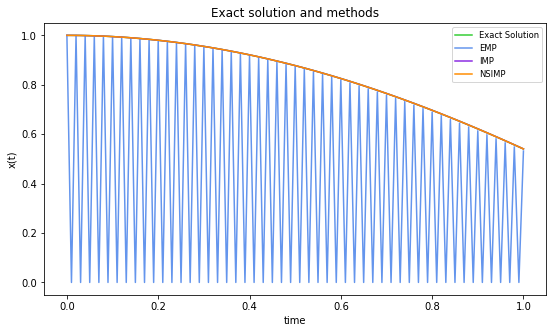

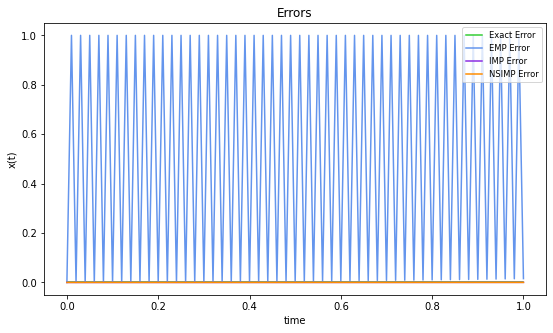


Testing using: steps = 100, x0 = 1, gamma = 0.0001, omega = 1.



  n     t        x_mid     x_imp    x_nsimp      err_mid      err_imp    err_nsimp     exact
---  ----  -----------  --------  ---------  -----------  -----------  -----------  --------
  0  0     1            1          1         0            0            0            1
  1  0.01  2e-06        0.999951   0.99995   0.999998     2.00091e-06  1.00086e-06  0.999949
  2  0.02  0.9996       0.999802   0.9998    0.000198047  4.00388e-06  2.00358e-06  0.999798
  3  0.03  4.0008e-06   0.999553   0.99955   0.999996     6.00933e-06  3.00837e-06  0.999547
  4  0.04  0.9988       0.999204   0.9992    0.000396268  8.01764e-06  4.01543e-06  0.999196
  5  0.05  6.0032e-06   0.998755   0.99875   0.999994     1.00292e-05  5.02497e-06  0.998745
  6  0.06  0.997601     0.998207   0.998201  0.000594825  1.20445e-05  6.03718e-06  0.998195
  7  0.07  8.00799e-06  0.997558   0.997551  0.999992     1.40639e-05  7.05227e-06  0.997544
  8  0.08 

In [61]:
# SCENARIO 9: 

# Setting gamma to 0.0001 and omega to 1: NSIMP has the smallest error of 0.00016871.
# IMP error is 0.000324461, which is not much larger than NSIMP error by a difference of 1.55751e-4.
# EMP error is 0.0155026, which is significantly larger than NSIMP and IMP errors.

steps = 100
x0 = 1
gamma = 0.0001
omega = 1
main()

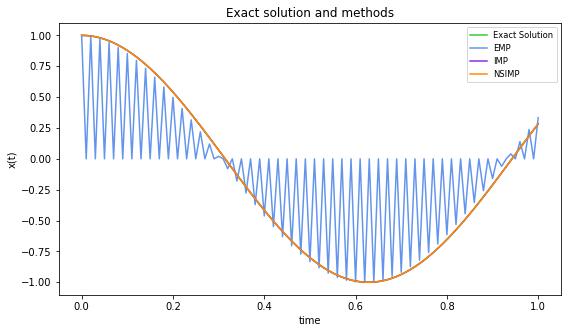

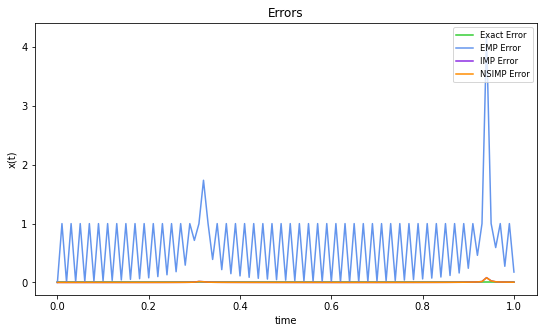


Testing using: steps = 100, x0 = 1, gamma = 0.0001, omega = 5.



  n     t         x_mid       x_imp     x_nsimp     err_mid      err_imp    err_nsimp       exact
---  ----  ------------  ----------  ----------  ----------  -----------  -----------  ----------
  0  0      1             1           1          0           0            0             1
  1  0.01   2e-06         0.998752    0.998751   0.999998    2.52289e-06  1.52164e-06   0.998749
  2  0.02   0.99          0.995008    0.995006   0.0050273   6.10311e-06  4.09558e-06   0.995002
  3  0.03   4.02e-06      0.988779    0.988776   0.999996    1.07668e-05  7.74279e-06   0.988768
  4  0.04   0.9701        0.980079    0.980075   0.0101653   1.65515e-05  1.24956e-05   0.980063
  5  0.05   6.0794e-06    0.96893     0.968925   0.999994    2.35074e-05  1.83985e-05   0.968908
  6  0.06   0.940499      0.955361    0.955355   0.0155253   3.1699e-05   2.55098e-05   0.955331
  7  0.07   8.19641e-06   0.939405    0.939398   0.999991    4.12

In [62]:
### BREAKING POINT ###

# SCENARIO 10: 

# Setting gamma to 0.0001 and omega to 5: NSIMP has the smallest error of 0.00358822.
# IMP error is 0.00365579, which is not much larger than NSIMP error by a difference of 1.55751e-4.
# EMP error is 0.176299, which is significantly larger than NSIMP and IMP errors.

# When t = 0.32, and the exact solution = -0.0291986, EMP breaks and the error = 1.73667
# When t = 0.94, and the exact solution =  -0.0123875, EMP breaks and the error = 4.19933

steps = 100
x0 = 1
gamma = 0.0001
omega = 5
main()

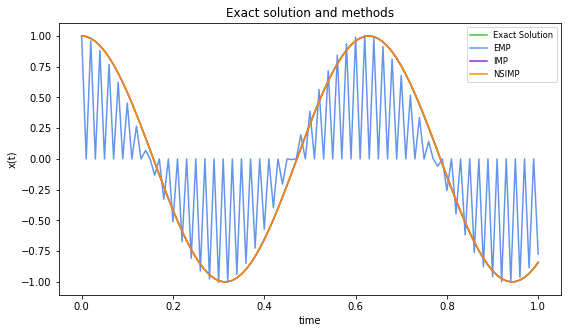

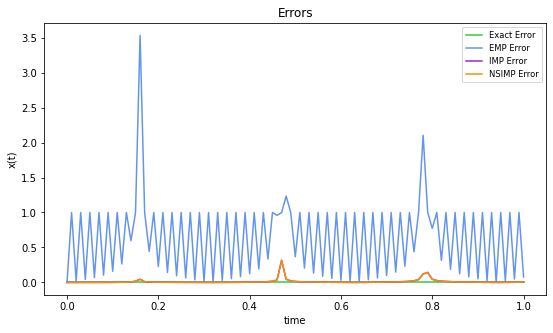


Testing using: steps = 100, x0 = 1, gamma = 0.0001, omega = 10.



  n     t         x_mid       x_imp     x_nsimp     err_mid      err_imp    err_nsimp       exact
---  ----  ------------  ----------  ----------  ----------  -----------  -----------  ----------
  0  0      1             1           1          0           0            0             1
  1  0.01   2e-06         0.995013    0.995012   0.999998    1.03528e-05  9.34776e-06   0.995003
  2  0.02   0.96          0.980102    0.9801     0.0204727   3.77764e-05  3.5746e-05    0.980065
  3  0.03   4.08e-06      0.955413    0.95541    0.999996    8.33763e-05  8.0278e-05    0.955334
  4  0.04   0.8816        0.921195    0.921191   0.0428391   0.000149124  0.000144889   0.921057
  5  0.05   6.3104e-06    0.877787    0.877782   0.999993    0.000238129  0.000232658   0.877578
  6  0.06   0.767936      0.825624    0.825618   0.0695414   0.000355119  0.000348268   0.825331
  7  0.07   8.74304e-06   0.765225    0.765218   0.999989    0.0

In [63]:
### BREAKING POINT ###

# SCENARIO 11: 

# Setting gamma to 0.0001 and omega to 10: NSIMP has the smallest error of 0.00536664.
# IMP error is 0.00537329, which is not much larger than NSIMP error by a difference of 6.65e-6.
# EMP error is 0.176299, which is significantly larger than NSIMP and IMP errors.

# When t = 0.16, and the exact solution = -0.0291991, EMP breaks and the error = 3.53199
#   IMP and NSIMP also break and the error = 0.046
# When t = 0.48, and the exact solution =  0.0874948, EMP breaks and the error = 1.23494
#   IMP and NSIMP also break and the error = 0.045
# When t = 0.78, and the exact solution =  0.0539512, EMP breaks and the error = 2.103
#   IMP and NSIMP also break and the error = 0.120

steps = 100
x0 = 1
gamma = 0.0001
omega = 10
main()

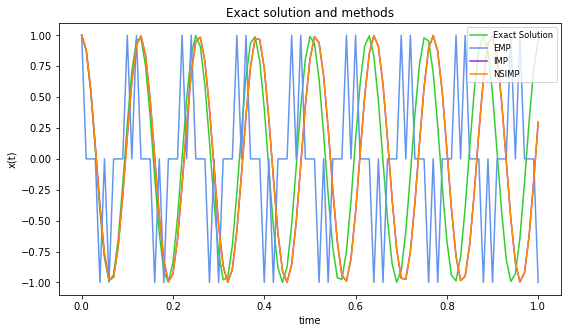

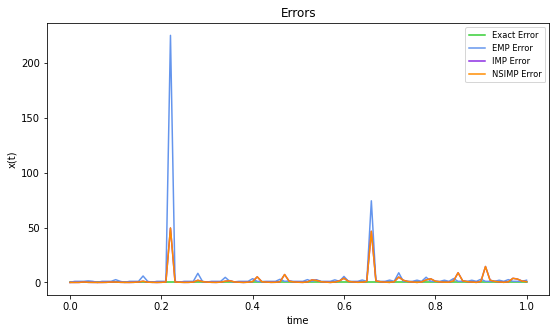


Testing using: steps = 100, x0 = 1, gamma = 0.0001, omega = 50.



  n     t         x_mid       x_imp     x_nsimp      err_mid      err_imp    err_nsimp       exact
---  ----  ------------  ----------  ----------  -----------  -----------  -----------  ----------
  0  0      1             1           1            0           0            0            1
  1  0.01   2e-06         0.882354    0.882353     0.999998    0.00543802   0.00543689   0.877582
  2  0.02  -8.00005e-12   0.557096    0.557094     1           0.0310835    0.0310803    0.540301
  3  0.03   6e-06         0.100757    0.100755     0.999915    0.424386     0.424358     0.070737
  4  0.04  -1            -0.379289   -0.37929      1.40301     0.0885664    0.0885621   -0.416145
  5  0.05   8e-06        -0.770089   -0.77009      1.00001     0.0387581    0.0387568   -0.80114
  6  0.06  -1            -0.979691   -0.979691     0.0101147   0.0103994    0.0103993   -0.989987
  7  0.07   2e-06        -0.958778   -0.958777     1    

In [64]:
### BREAKING POINT ###

# SCENARIO 12: 

# Setting gamma to 0.0001 and omega to 50: NSIMP and IMP have the smallest error of 0.692717.
# EMP error is 2.03641, which is significantly larger than IMP and EMP errors.
# These results are very simmilar to SCENARIO 4 (gamma=0 and omega=50) and SCENARIO 8 (gamma=0.00001 and omega=50),
# only this time the errors are very slightly higher.

# When t = 0.22, and the exact solution = 0.0044256, EMP breaks and the error = 224.958
#   IMP and NSIMP also break and the error = 49.54
# When t = 0.66, and the exact solution =  -0.0132759, EMP breaks and the error = 74.3246
#   IMP and NSIMP also break and the error = 46.5552

steps = 100
x0 = 1
gamma = 0.0001
omega = 50
main()

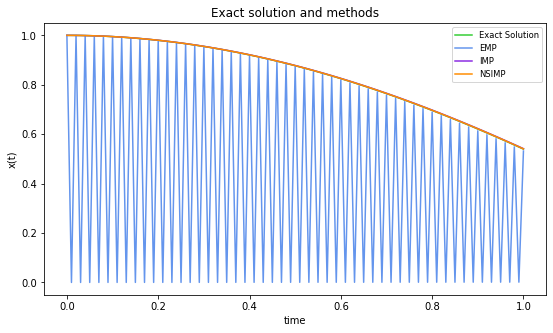

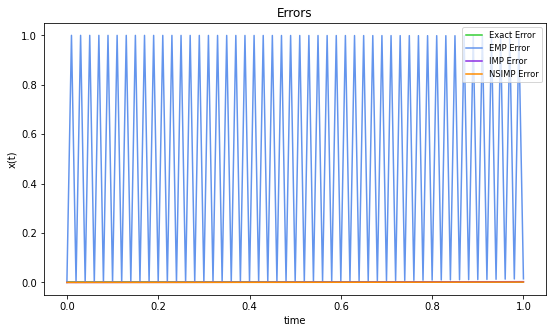


Testing using: steps = 100, x0 = 1, gamma = 0.001, omega = 1.



  n     t        x_mid     x_imp    x_nsimp      err_mid      err_imp    err_nsimp     exact
---  ----  -----------  --------  ---------  -----------  -----------  -----------  --------
  0  0     1            1          1         0            0            0            1
  1  0.01  2e-05        0.99996    0.99995   0.99998      2.00016e-05  1.0001e-05   0.99994
  2  0.02  0.9996       0.99982    0.9998    0.000180051  4.00088e-05  2.00056e-05  0.99978
  3  0.03  4.0008e-05   0.99958    0.99955   0.99996      6.00258e-05  3.00158e-05  0.99952
  4  0.04  0.9988       0.99924    0.9992    0.000360285  8.00564e-05  4.00336e-05  0.99916
  5  0.05  6.0032e-05   0.9988     0.99875   0.99994      0.000100105  5.00609e-05  0.9987
  6  0.06  0.997601     0.998261   0.998201  0.000540862  0.000120175  6.00998e-05  0.998141
  7  0.07  8.00799e-05  0.997621   0.997551  0.99992      0.000140271  7.01524e-05  0.997481
  8  0.08  0.9960

In [65]:
# SCENARIO 13: 

# Setting gamma to 0.001 and omega to 1: NSIMP has the smallest error of 0.0015696.
# IMP error is 0.0031278, which is not much larger than NSIMP error by a difference of 1.5582e-3.
# EMP error is 0.0146187, which is significantly larger than NSIMP and IMP errors.

steps = 100
x0 = 1
gamma = 0.001
omega = 1
main()

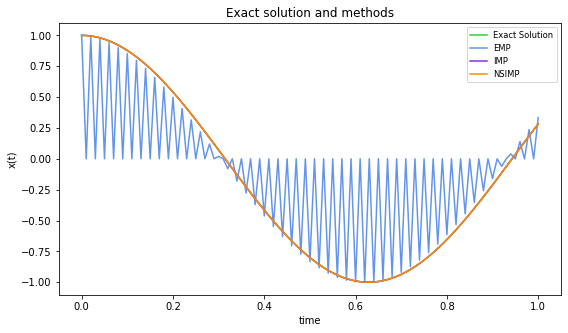

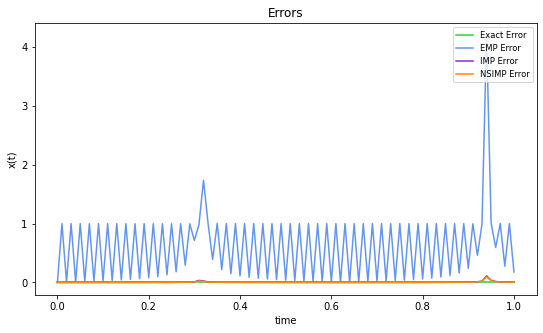


Testing using: steps = 100, x0 = 1, gamma = 0.001, omega = 5.



  n     t         x_mid       x_imp     x_nsimp     err_mid      err_imp    err_nsimp       exact
---  ----  ------------  ----------  ----------  ----------  -----------  -----------  ----------
  0  0      1             1           1          0           0            0             1
  1  0.01   2e-05         0.998761    0.998751   0.99998     2.05398e-05  1.05272e-05   0.99874
  2  0.02   0.99          0.995026    0.995006   0.00500939  4.22273e-05  2.21519e-05   0.994984
  3  0.03   4.02e-05      0.988806    0.988776   0.999959    6.5181e-05   3.49411e-05   0.988741
  4  0.04   0.9701        0.980115    0.980075   0.0101297   8.95346e-05  4.89751e-05   0.980027
  5  0.05   6.0794e-05    0.968976    0.968926   0.999937    0.00011544   6.43494e-05   0.968864
  6  0.06   0.940499      0.955416    0.955357   0.0154721   0.000143071  8.11772e-05   0.955279
  7  0.07   8.19641e-05   0.939469    0.939401   0.999913    0.0001

In [66]:
### BREAKING POINT ###

# SCENARIO 14: 

# Setting gamma to 0.001 and omega to 5: NSIMP has the smallest error of 0.00419657.
# IMP error is 0.00487259, which is not much larger than NSIMP error by a difference of 6.7602e-4.
# EMP error is 0.0146187, which is significantly larger than NSIMP and IMP errors.

# When t = 0.32, and the exact solution = -0.0291901, EMP breaks and the error = 1.73747
#   IMP and NSIMP also break and the error = 0.0250996
# When t = 0.94, and the exact solution =  -0.0123771, EMP breaks and the error = 4.20203
#   IMP and NSIMP also break and the error = 0.1


steps = 100
x0 = 1
gamma = 0.001
omega = 5
main()

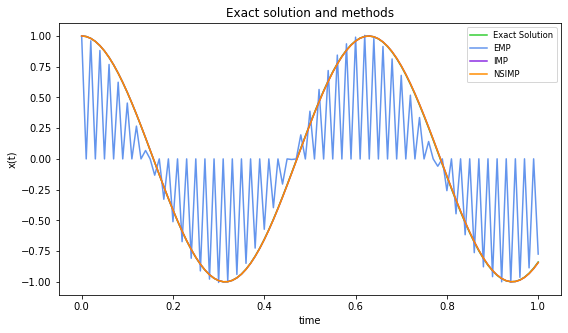

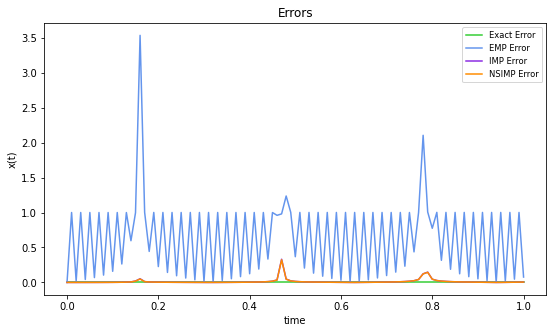


Testing using: steps = 100, x0 = 1, gamma = 0.001, omega = 10.



  n     t         x_mid       x_imp     x_nsimp     err_mid      err_imp    err_nsimp       exact
---  ----  ------------  ----------  ----------  ----------  -----------  -----------  ----------
  0  0      1             1           1          0           0            0             1
  1  0.01   2e-05         0.995022    0.995012   0.99998     2.84205e-05  1.83703e-05   0.994994
  2  0.02   0.96          0.98012     0.9801     0.0204551   7.42792e-05  5.39747e-05   0.980047
  3  0.03   4.08e-05      0.955441    0.955411   0.999957    0.000139079  0.000108095   0.955308
  4  0.04   0.8816        0.921232    0.921193   0.0428047   0.000225256  0.00018291    0.921024
  5  0.05   6.3104e-05    0.877834    0.877786   0.999928    0.000336501  0.000281786   0.877539
  6  0.06   0.767936      0.825681    0.825624   0.0694912   0.000478309  0.000409793   0.825286
  7  0.07   8.74304e-05   0.765293    0.765228   0.999886    0.00

In [67]:
### BREAKING POINT ###

# SCENARIO 15: 

# Setting gamma to 0.001 and omega to 10: NSIMP has the smallest error of 0.00542421.
# IMP error is 0.00549075, which is not much larger than NSIMP error by a difference of 6.654e-5.
# EMP error is 0.0769078, which is significantly larger than NSIMP and IMP errors.

# When t = 0.16, and the exact solution = -0.0291948, EMP breaks and the error = 3.53264
#   IMP and NSIMP also break and the error = 0.05
# When t = 0.48, and the exact solution =  0.087457, EMP breaks and the error = 1.23591
#   IMP and NSIMP also break and the error =  0.047
# When t = 0.78, and the exact solution =  0.0539134, EMP breaks and the error = 2.10378
#   IMP and NSIMP also break and the error = 0.12

steps = 100
x0 = 1
gamma = 0.001
omega = 10
main()

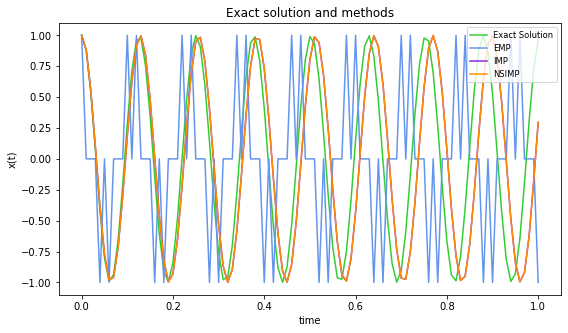

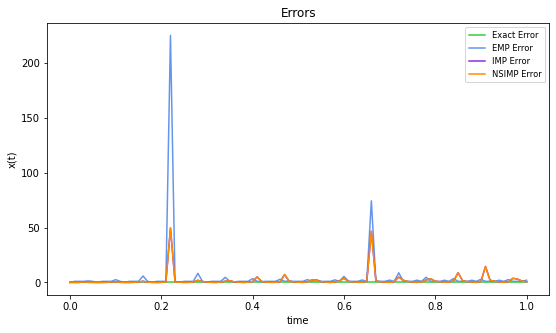


Testing using: steps = 100, x0 = 1, gamma = 0.001, omega = 50.



  n     t      x_mid       x_imp     x_nsimp      err_mid      err_imp    err_nsimp        exact
---  ----  ---------  ----------  ----------  -----------  -----------  -----------  -----------
  0  0      1          1           1            0           0            0            1
  1  0.01   2e-05      0.882363    0.882354     0.999977    0.00545786   0.00544654   0.877574
  2  0.02  -8e-10      0.557116    0.557099     1           0.03114      0.031108     0.540292
  3  0.03   6e-05      0.10079     0.10077      0.999152    0.424895     0.424611     0.0707351
  4  0.04  -1         -0.379243   -0.37926      1.40309     0.0886445    0.0886022   -0.41613
  5  0.05   8e-05     -0.770033   -0.770044     1.0001      0.0387842    0.0387711   -0.801104
  6  0.06  -1         -0.979634   -0.979635     0.0101693   0.0104035    0.010403    -0.989933
  7  0.07   2e-05     -0.958731   -0.958722     1.00002     0.0238576    0.023847

In [80]:
### BREAKING POINT ###

# SCENARIO 16: 

# Setting gamma to 0.001 and omega to 50: NSIMP has the smallest error of 0.692735.
# IMP error is 0.692736, which is not much larger than NSIMP error by a difference of 1e-6.
# EMP error is 2.03734, which is significantly larger than NSIMP and IMP errors.
# These results are very simmilar to SCENARIO 4 (gamma=0 and omega=50), SCENARIO 8 (gamma=0.00001 and omega=50),
# and SCENARIO 12 (gamma=0.0001 and omega=50), only this time the errors are slightly higher.

# When t = 0.22, and the exact solution = 0.00442472, EMP breaks and the error = 225.003
#   IMP and NSIMP also break and the error = 49.54
# When t = 0.66, and the exact solution = -0.013268, EMP breaks and the error = 74.3694
#   IMP and NSIMP also break and the error =  46.56

steps = 100
x0 = 1
gamma = 0.001
omega = 50
main()

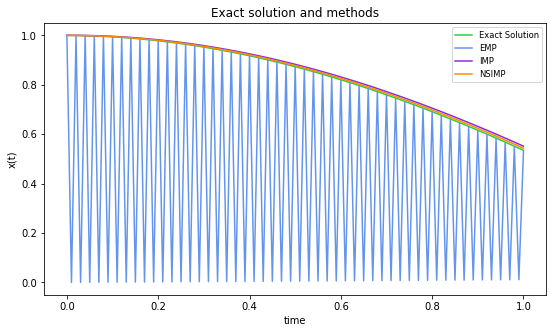

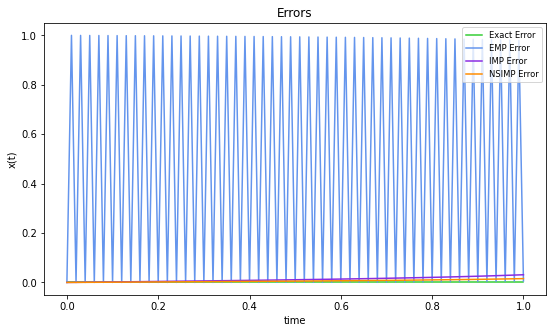


Testing using: steps = 100, x0 = 1, gamma = 0.01, omega = 1.



  n     t       x_mid     x_imp    x_nsimp      err_mid      err_imp    err_nsimp     exact
---  ----  ----------  --------  ---------  -----------  -----------  -----------  --------
  0  0     1           1          1         0            0            0            1
  1  0.01  0.0002      1.00005    0.99995   0.9998       0.000200008  9.99983e-05  0.99985
  2  0.02  0.9996      1          0.9998    1.66721e-07  0.000400058  0.000200008  0.9996
  3  0.03  0.00040008  0.99985    0.99955   0.9996       0.00060019   0.00030005   0.99925
  4  0.04  0.9988      0.9996     0.9992    6.67291e-07  0.000800444  0.000400143  0.998801
  5  0.05  0.00060032  0.99925    0.998751  0.999399     0.00100086   0.000500309  0.998251
  6  0.06  0.9976      0.998801   0.998201  1.66309e-06  0.00120148   0.000600566  0.997602
  7  0.07  0.0008008   0.998251   0.997552  0.999197     0.00140234   0.000700935  0.996853
  8  0.08  0.996002    0.9

In [69]:
# SCENARIO 17: 

# Setting gamma to 0.01 and omega to 1: NSIMP has the smallest error of 0.0155079.
# IMP error is 0.0311593, which is not much larger than NSIMP error by a difference of 1.56514e-2.
# EMP error is 0.00597413, which is significantly larger than NSIMP and IMP errors.
 
steps = 100
x0 = 1
gamma = 0.01
omega = 1
main()

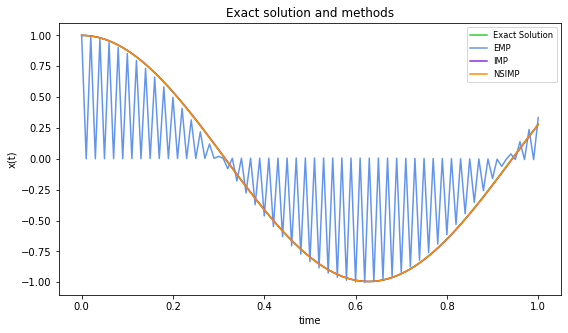

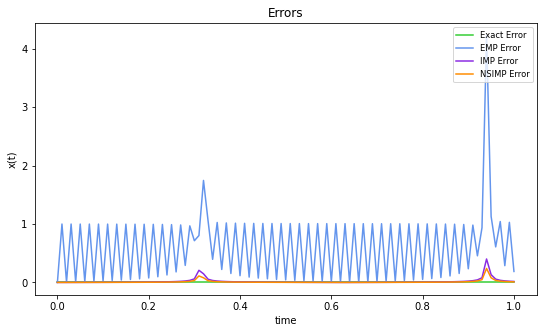


Testing using: steps = 100, x0 = 1, gamma = 0.01, omega = 5.



  n     t         x_mid       x_imp     x_nsimp     err_mid      err_imp    err_nsimp       exact
---  ----  ------------  ----------  ----------  ----------  -----------  -----------  ----------
  0  0      1             1           1          0           0            0             1
  1  0.01   0.0002        0.998851    0.998751   0.9998      0.000200709  0.000100579   0.99865
  2  0.02   0.99          0.995207    0.995007   0.00483038  0.00040347   0.000202697   0.994805
  3  0.03   0.000402      0.989077    0.988778   0.999593    0.000609324  0.000306883   0.988475
  4  0.04   0.9701        0.980477    0.98008    0.0097736   0.000819366  0.000413698   0.979675
  5  0.05   0.00060794    0.96943     0.968935   0.999372    0.00103476   0.000523745   0.968428
  6  0.06   0.940499      0.955964    0.955372   0.014941    0.00125679   0.000637686   0.954764
  7  0.07   0.000819641   0.940111    0.939426   0.999127    0.00148

In [70]:
### BREAKING POINT ###

# SCENARIO 18: 

# Setting gamma to 0.01 and omega to 5: NSIMP has the smallest error of 0.0102502.
# IMP error is 0.0170413, which is not much larger than NSIMP error by a difference of 1.56514e-2.
# EMP error is 0.188205, which is significantly larger than NSIMP and IMP errors.

# When t = 0.32, and the exact solution = -0.029103, EMP breaks and the error = 1.74601
# When t = 0.94, and the exact solution = -0.0122821, EMP breaks and the error = 4.22925

steps = 100
x0 = 1
gamma = 0.01
omega = 5
main()

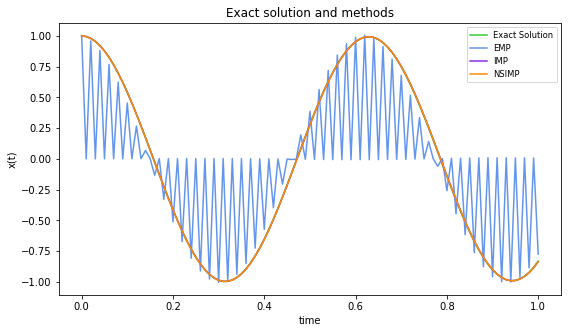

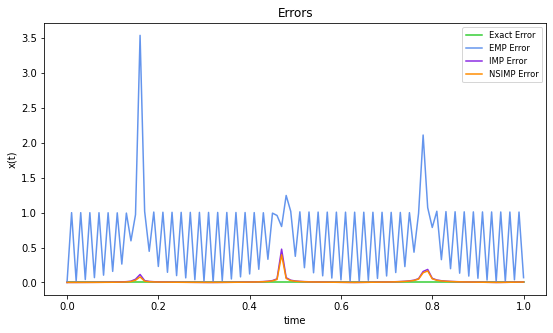


Testing using: steps = 100, x0 = 1, gamma = 0.01, omega = 10.



  n     t         x_mid       x_imp     x_nsimp     err_mid      err_imp    err_nsimp       exact
---  ----  ------------  ----------  ----------  ----------  -----------  -----------  ----------
  0  0      1             1           1          0           0            0             1
  1  0.01   0.0002        0.995113    0.995013   0.999799    0.000209098  0.000108592   0.994905
  2  0.02   0.96          0.980301    0.980102   0.0202789   0.000439307  0.000236244   0.979871
  3  0.03   0.000408      0.955715    0.955419   0.999573    0.000696109  0.000386227   0.95505
  4  0.04   0.8816        0.921601    0.921211   0.0424604   0.000986583  0.00056304    0.920693
  5  0.05   0.00063104    0.878302    0.877822   0.999281    0.00132022   0.000772948   0.877144
  6  0.06   0.767936      0.826251    0.825686   0.0689893   0.0017102    0.00102486    0.824841
  7  0.07   0.000874304   0.76597     0.765325   0.998856    0.0021

In [71]:
### BREAKING POINT ###

# SCENARIO 19: 

# Setting gamma to 0.01 and omega to 10: NSIMP has the smallest error of 0.00599699.
# IMP error is 0.00666528, which is not much larger than NSIMP error by a difference of 6.6829e-2.
# EMP error is 0.0685294, which is significantly larger than NSIMP and IMP errors.


# When t = 0.16, and the exact solution = -0.029152, EMP breaks and the error = 3.53939
#   IMP and NSIMP also break and the error = 0.9
# When t = 0.48, and the exact solution = 0.0870776, EMP breaks and the error = 1.24576
#   IMP and NSIMP also break and the error =  0.6
# When t = 0.78, and the exact solution = 0.0535401, EMP breaks and the error = 2.11173
#   IMP and NSIMP also break and the error =  0.14

steps = 100
x0 = 1
gamma = 0.01
omega = 10
main()

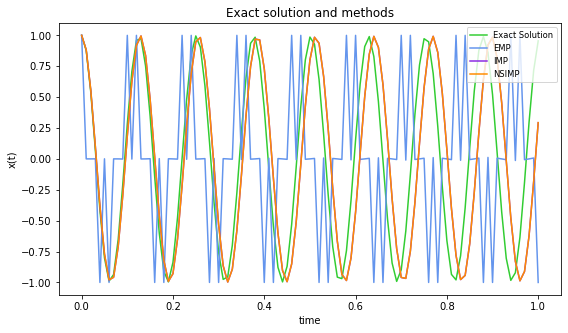

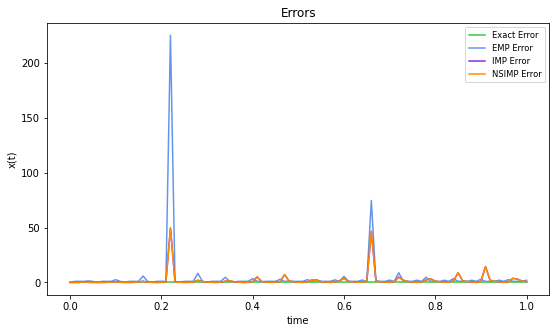


Testing using: steps = 100, x0 = 1, gamma = 0.01, omega = 50.



  n     t         x_mid       x_imp     x_nsimp      err_mid      err_imp    err_nsimp        exact
---  ----  ------------  ----------  ----------  -----------  -----------  -----------  -----------
  0  0      1             1           1            0           0            0            1
  1  0.01   0.0002        0.882458    0.882359     0.999772    0.00565623   0.00554306   0.877495
  2  0.02  -8e-08         0.557321    0.557148     1           0.0317042    0.0313846    0.540194
  3  0.03   0.0006        0.101123    0.100922     0.991515    0.429981     0.427142     0.070716
  4  0.04  -1            -0.378781   -0.378957     1.40396     0.0894256    0.0890023   -0.41598
  5  0.05   0.0008       -0.769478   -0.769583     1.001       0.0390454    0.0389144   -0.800743
  6  0.06  -1            -0.979064   -0.97907      0.0107152   0.010445     0.0104394   -0.989399
  7  0.07   0.0002       -0.958265   -0.958169     1.000

In [72]:
### BREAKING POINT ###

# SCENARIO 20: 

# Setting gamma to 0.01 and omega to 50: NSIMP has the smallest error of 0.692913.
# IMP error is 0.692931, which is not much larger than NSIMP error by a difference of 1.8e-5.
# EMP error is 2.04679, which is significantly larger than NSIMP and IMP errors.
# These results are very simmilar to SCENARIO 4 (gamma=0 and omega=50), SCENARIO 8 (gamma=0.00001 and omega=50),
# SCENARIO 12 (gamma=0.0001 and omega=50) and SCENARIO 16 (gamma=0.001 and omega=50) 
# only this time the errors are slightly higher.

# When t = 0.22, and the exact solution = 0.00441575, EMP breaks and the error = 225.463
#   IMP and NSIMP also break and the error =  49.6
# When t = 0.66, and the exact solution = -0.0131888, EMP breaks and the error = 74.8244
#   IMP and NSIMP also break and the error = 46.6

steps = 100
x0 = 1
gamma = 0.01
omega = 50
main()

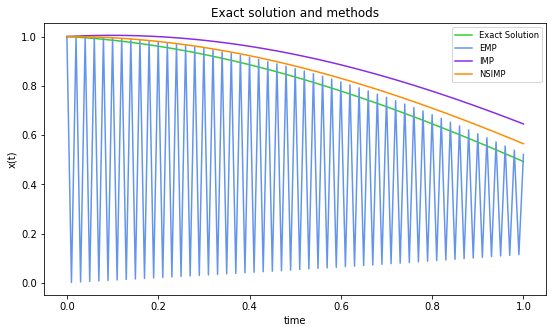

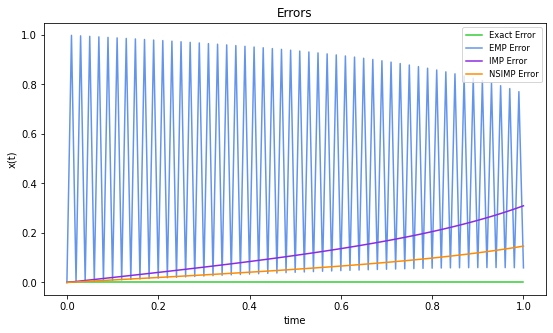


Testing using: steps = 100, x0 = 1, gamma = 0.1, omega = 1.



  n     t       x_mid     x_imp    x_nsimp     err_mid     err_imp    err_nsimp     exact
---  ----  ----------  --------  ---------  ----------  ----------  -----------  --------
  0  0     1           1          1         0           0           0            1
  1  0.01  0.002       1.00095    0.99995   0.997998    0.00200008  0.000999525  0.998951
  2  0.02  0.999592    1.0018     0.999798  0.00179153  0.00400055  0.00199825   0.997804
  3  0.03  0.00400083  1.00254    0.999546  0.995985    0.00600182  0.00299637   0.99656
  4  0.04  0.998776    1.00319    0.999194  0.00357399  0.00800427  0.00399408   0.995219
  5  0.05  0.00600333  1.00373    0.998742  0.993959    0.0100083   0.00499158   0.993781
  6  0.06  0.997553    1.00417    0.99819   0.0053471   0.0120144   0.00598906   0.992247
  7  0.07  0.00800831  1.00451    0.997538  0.991916    0.0140228   0.00698673   0.990617
  8  0.08  0.995922    1.00475    0.996787  

In [73]:
# SCENARIO 21: 

# Setting gamma to 0.1 and omega to 1: NSIMP has the smallest error of 0.146815.
# IMP error is 0.30964, which is not much larger than NSIMP error by a difference of 1.62825e-1.
# EMP error is 0.0589178, which is significantly smaller than NSIMP and IMP errors.

steps = 100
x0 = 1
gamma = 0.1
omega = 1
main()

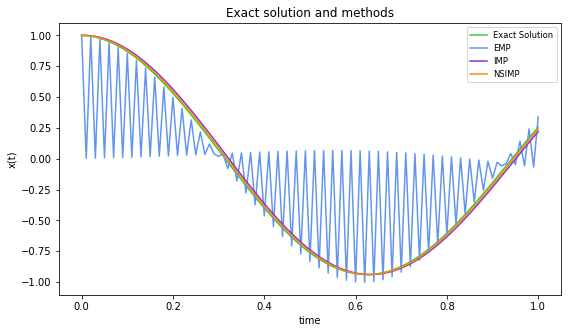

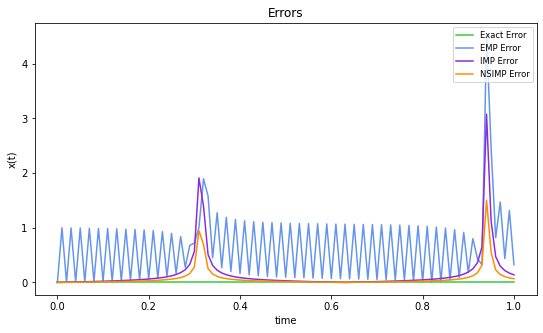


Testing using: steps = 100, x0 = 1, gamma = 0.1, omega = 5.



  n     t        x_mid        x_imp      x_nsimp     err_mid      err_imp    err_nsimp       exact
---  ----  -----------  -----------  -----------  ----------  -----------  -----------  ----------
  0  0      1            1            1           0           0            0             1
  1  0.01   0.002        0.99975      0.998751    0.997995    0.0020024    0.00100065    0.997753
  2  0.02   0.989992     0.997006     0.99501     0.00304741  0.00401589   0.00200636    0.993018
  3  0.03   0.00402003   0.991779     0.988793    0.995922    0.00605074   0.00302225    0.985814
  4  0.04   0.970076     0.984086     0.980119    0.00623468  0.00811764   0.00405367    0.976162
  5  0.05   0.00607953   0.973953     0.969015    0.993694    0.0102279    0.00510626    0.964092
  6  0.06   0.940451     0.961409     0.955514    0.00967552  0.0123939    0.00618612    0.949639
  7  0.07   0.00819673   0.94649      0.939654    0.991213 

In [77]:
### BREAKING POINT ###

# SCENARIO 22: 

# Setting gamma to 0.1 and omega to 5: NSIMP has the smallest error of 0.0680003.
# IMP error is 0.139262, which is larger than NSIMP error by a difference of 7.12617e-2.
# EMP error is 0.322149, which is larger than NSIMP and IMP errors.

# When t = 0.32, and the exact solution = -0.0279701, EMP breaks and the error = 1.89372,
#   IMP also breaks and the error = 1.91057 and NSIMP also breaks and the error =  0.948045
# When t = 0.94, and the exact solution = -0.0121329, EMP breaks and the error = 4.51616,
#   IMP also breaks and the error = 3.07488 and NSIMP also breaks and the error = 1.50329

steps = 100
x0 = 1
gamma = 0.1
omega = 5
main()

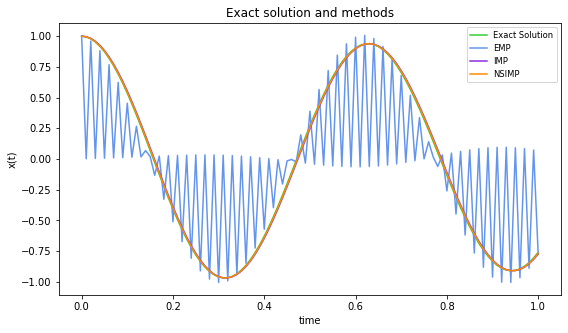

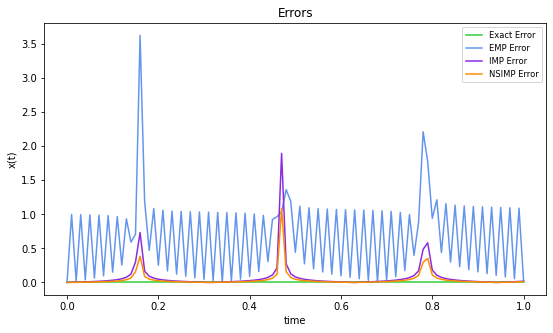


Testing using: steps = 100, x0 = 1, gamma = 0.1, omega = 10.



  n     t        x_mid        x_imp     x_nsimp     err_mid      err_imp    err_nsimp       exact
---  ----  -----------  -----------  ----------  ----------  -----------  -----------  ----------
  0  0      1            1            1          0           0            0             1
  1  0.01   0.002        0.996014     0.995014   0.997988    0.00201587   0.00101036    0.99401
  2  0.02   0.959992     0.98211      0.980122   0.0185239   0.00408958   0.00205713    0.97811
  3  0.03   0.00408003   0.958448     0.955492   0.995716    0.00626639   0.0031634     0.952479
  4  0.04   0.881576     0.925281     0.921389   0.039041    0.00859981   0.00435678    0.917392
  5  0.05   0.00631053   0.88296      0.878171   0.992773    0.0111573    0.00567233    0.873218
  6  0.06   0.767888     0.831925     0.826287   0.0640252   0.014029     0.00715714    0.820415
  7  0.07   0.00874335   0.772701     0.766272   0.988488    0.017341

In [78]:
### BREAKING POINT ###

# SCENARIO 23: 

# Setting gamma to 0.1 and omega to 10: NSIMP has the smallest error of 0.0114326.
# IMP error is 0.0183927, which is not much larger than NSIMP error by a difference of 6.69601e-3.
# EMP error is 0.0228063, which is larger than NSIMP and IMP errors.

# When t = 0.16, and the exact solution = -0.0286573, EMP breaks and the error = 3.62715,
#   IMP also breaks and the error = 0.732263 and NSIMP also breaks and the error =  0.386233
# When t = 0.47, and the exact solution = -0.0120441, EMP breaks and the error = 1.36267,
#   IMP also breaks and the error = 1.89416 and NSIMP also breaks and the error = 1.08321
# When t = 0.79, and the exact solution = -0.0421432, EMP breaks and the error = 2.21112,
#   IMP also breaks and the error = 0.582067 and NSIMP also breaks and the error = 0.354439

steps = 100
x0 = 1
gamma = 0.1
omega = 10
main()

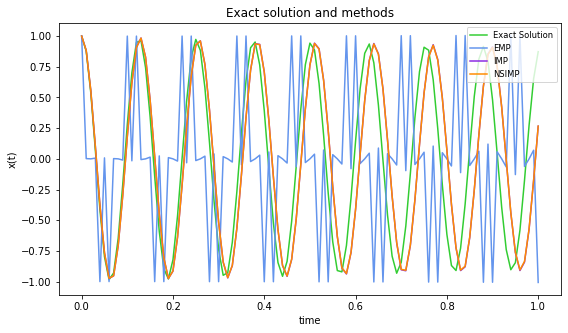

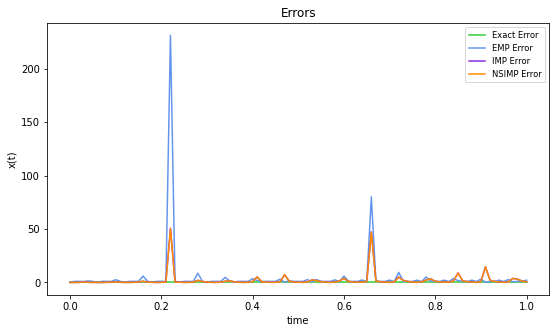


Testing using: steps = 100, x0 = 1, gamma = 0.1, omega = 50.



  n     t         x_mid        x_imp      x_nsimp      err_mid      err_imp    err_nsimp        exact
---  ----  ------------  -----------  -----------  -----------  -----------  -----------  -----------
  0  0      1             1            1             0           0            0            1
  1  0.01   0.002         0.883404     0.882411      0.997719    0.00763991   0.00650773   0.876706
  2  0.02  -8e-06         0.559363     0.557638      1.00001     0.0373467    0.0341481    0.539224
  3  0.03   0.00600003    0.10444      0.102435      0.914927    0.480823     0.452398     0.0705283
  4  0.04  -1.00002      -0.374178    -0.375937      1.41271     0.0972386    0.0929966   -0.414482
  5  0.05   0.0080001    -0.763937    -0.764985      1.01004     0.0416582    0.0403441   -0.797145
  6  0.06  -1.00002      -0.973382    -0.973438      0.0162128   0.0108601    0.0108031   -0.984069
  7  0.07   0.00200006   -0.953618   

In [79]:
### BREAKING POINT ###

# SCENARIO 24: 

# Setting gamma to 0.1 and omega to 50: NSIMP has the smallest error of 0.694686.
# IMP error is 0.694959, which is not much larger than NSIMP error by a difference of 2.73e-4.
# EMP error is 2.15328, which is significantly larger than NSIMP and IMP errors.
# These results are very similar to SCENARIO 4 (gamma=0 and omega=50), SCENARIO 8 (gamma=0.00001 and omega=50),
# SCENARIO 12 (gamma=0.0001 and omega=50), SCENARIO 16 (gamma=0.001 and omega=50) and
# SCENARIO 20 (gamma=0.01 and omega=50) only this time the errors are slightly higher.

# When t = 0.22, and the exact solution = 0.00430787, EMP breaks and the error = 231.222,
#   IMP also breaks and the error = 50.7385 and NSIMP also breaks and the error =  50.2265
# When t = 0.66, and the exact solution = -0.012367, EMP breaks and the error = 80.0953,
#   IMP also breaks and the error = 47.2058 and NSIMP also breaks and the error = 46.9029

steps = 100
x0 = 1
gamma = 0.1
omega = 50
main()